In [1]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_train  = '/Users/trushshashank/Documents/Project 7th sem/archive/train/images'
ext = "*.jpg"
label_train = '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels'
t_ext = '*.txt'

In [3]:
path_valid  = '/Users/trushshashank/Documents/Project 7th sem/archive/valid/images'
label_valid = '/Users/trushshashank/Documents/Project 7th sem/archive/valid/labels'

In [4]:
img = [f for f in glob.glob(path_train +'**/'+ext,recursive=True)]

In [6]:
i =cv2.imread(img[0])

In [7]:
i.shape 

(640, 640, 3)

In [8]:
lab = [t for t in glob.glob(label_train + '**/'+t_ext,recursive=True)]

In [9]:
lab

['/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/18_jpg.rf.994d852b69fea828ad4ce657bc1d8768.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/644_jpg.rf.eb9cfaeb78f11969a4eaa7357861e235.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/581_jpg.rf.48f97c69855242158ecb7086af9802cd.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/140_jpg.rf.5af34c148011ae918d4130e4736061c6.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/235_jpg.rf.3cd721d1134443f15ee93de0f3637bb3.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/527_jpg.rf.8e3ed6f5793d5c8498df6d5d17887492.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/452_jpg.rf.b6e77753d58879a10c9210d4d19d4a88.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/547_jpg.rf.5509a9a54cd548782b1b2dd423a332dd.txt',
 '/Users/trushshashank/Documents/Project 

In [10]:
lab_s = lab[:30]

In [11]:
lab_s

['/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/18_jpg.rf.994d852b69fea828ad4ce657bc1d8768.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/644_jpg.rf.eb9cfaeb78f11969a4eaa7357861e235.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/581_jpg.rf.48f97c69855242158ecb7086af9802cd.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/140_jpg.rf.5af34c148011ae918d4130e4736061c6.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/235_jpg.rf.3cd721d1134443f15ee93de0f3637bb3.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/527_jpg.rf.8e3ed6f5793d5c8498df6d5d17887492.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/452_jpg.rf.b6e77753d58879a10c9210d4d19d4a88.txt',
 '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels/547_jpg.rf.5509a9a54cd548782b1b2dd423a332dd.txt',
 '/Users/trushshashank/Documents/Project 

In [12]:
img_s = img[:30]

In [13]:
n = len(img)
n

2067

In [14]:
l = len(lab)
l

2067

In [15]:
x, y, width, height = [], [], [], []
for label_path in lab_s:
    with open(label_path, 'r') as file:
        for line in file:
            p = line.split(' ')
            x.append(float(float(p[1]) - float(float(p[3])/2)))
            y.append(float(float(p[2]) - float(float(p[4])/2)))
            width.append(float(p[3]))
            height.append(float(p[4]))

In [16]:
x[:5]

[0.36418232069540774,
 0.0,
 0.18040472071695876,
 0.4827894142945236,
 0.23447265785651117]

In [17]:
h,w,c = i.shape

In [18]:
scale =h


In [19]:
scale

640

In [20]:
# rescaling the coordinates to fit the scale of the images which is 640 x 640
for i in range(len(x)):
    x[i] = x[i] * scale
    y[i] = y[i] * scale
    width[i] = width[i] * scale
    height[i] = height[i] * scale

In [21]:
x[i]

0.0

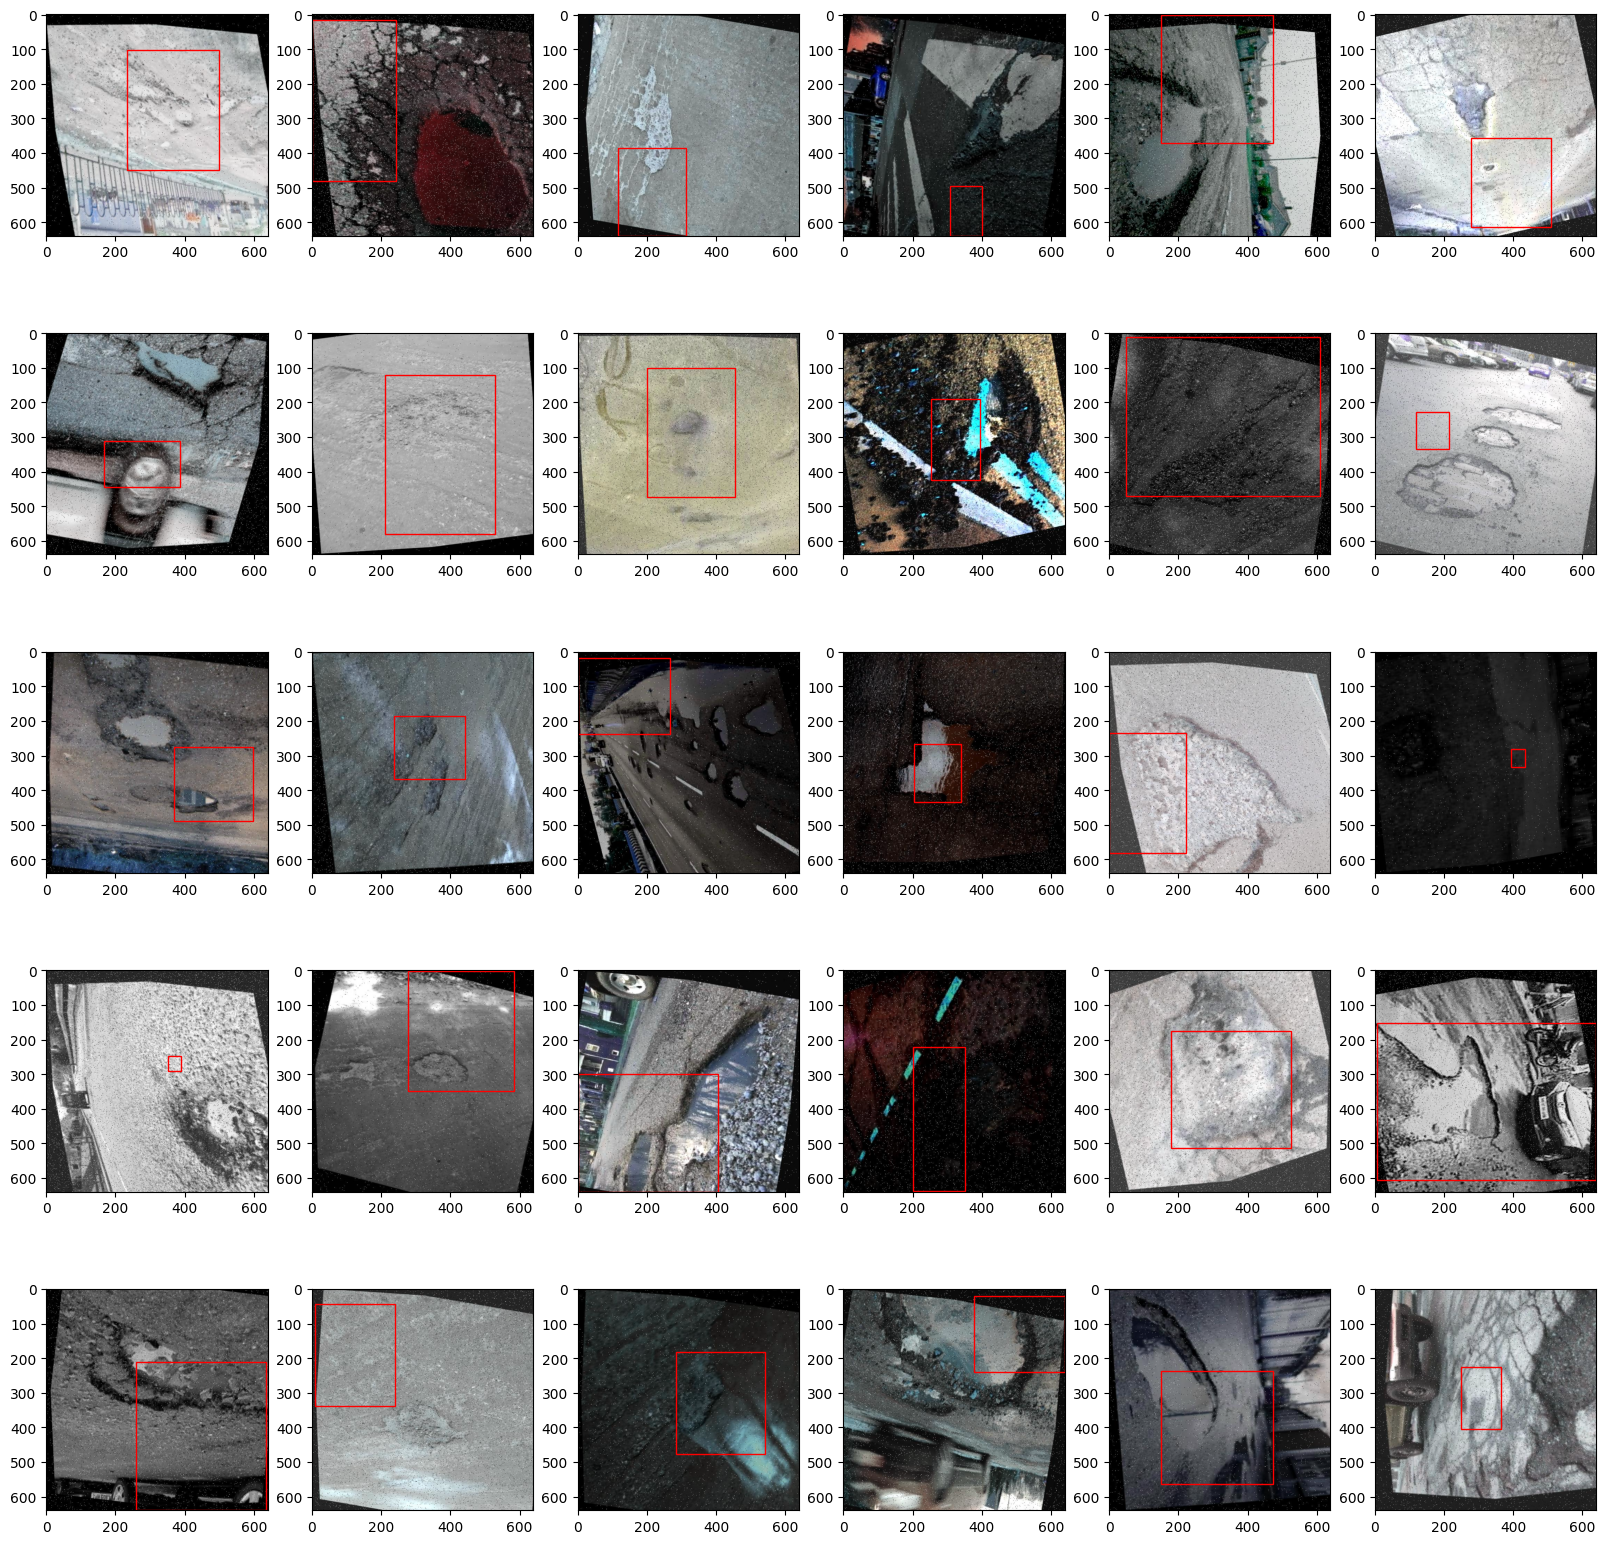

In [22]:
from matplotlib.patches import Rectangle

fig,ax = plt.subplots(5,6,figsize=(20,20))
ax = ax.ravel()
for i,im in enumerate(img_s):    
    fi = os.path.join(path_train,im)
    re = cv2.imread(fi)
    ax[i].imshow(re)
    rect = Rectangle((x[i], y[i]), width[i], height[i], linewidth=1, edgecolor='r', facecolor='none')  
    ax[i].add_patch(rect)
plt.show()

In [24]:
import os
import shutil
import cv2
from ultralytics import YOLO


In [30]:
# Define paths for training and validation
path_train = '/Users/trushshashank/Documents/Project 7th sem/archive/train/images'
label_train = '/Users/trushshashank/Documents/Project 7th sem/archive/train/labels'
path_valid = '/Users/trushshashank/Documents/Project 7th sem/archive/valid/images'
label_valid = '/Users/trushshashank/Documents/Project 7th sem/archive/valid/labels'

In [31]:
# Ensure image and label file extensions
ext = "*.jpg"
t_ext = "*.txt"

In [32]:
# Create YAML configuration for YOLOv8
config_data = """
path: /Users/trushshashank/Documents/Project 7th sem/archive  # Root directory of your dataset

train: train/images  # Directory containing training images
val: valid/images  # Directory containing validation images

# Class names for object detection
names:
  0: pothole
"""

In [33]:
# Save the configuration file
config_file = "/Users/trushshashank/Documents/Project 7th sem/archive/pothole_detection.yaml"
with open(config_file, "w") as file:
    file.write(config_data)

In [34]:
# Initialize the YOLOv8 model (YOLOv8n is a small, lightweight model, can also try YOLOv8s/m/l/x)
model = YOLO('yolov8n.pt')  # Pre-trained model


In [35]:
# Train the model on your custom dataset
model.train(data=config_file, epochs=50, imgsz=640)  

Ultralytics YOLOv8.2.101 🚀 Python-3.10.0 torch-2.2.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/trushshashank/Documents/Project 7th sem/archive/pothole_detection.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /Users/trushshashank/Documents/Project 7th sem/archive/train/labels... 2067 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:00<00:00, 3242.14it/s]

train: New cache created: /Users/trushshashank/Documents/Project 7th sem/archive/train/labels.cache



val: Scanning /Users/trushshashank/Documents/Project 7th sem/archive/valid/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 2271.10it/s]

val: New cache created: /Users/trushshashank/Documents/Project 7th sem/archive/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.817       2.57       1.92         12        640: 100%|██████████| 130/130 [14:42<00:00,  6.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         16         25        0.4       0.32      0.297     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.779      2.266      1.912          8        640: 100%|██████████| 130/130 [14:11<00:00,  6.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all         16         25      0.325       0.16      0.124     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.849      2.231      1.975          7        640: 100%|██████████| 130/130 [14:32<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         16         25        0.4        0.4      0.297     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.819      2.164      1.939         25        640: 100%|██████████| 130/130 [15:02<00:00,  6.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all         16         25      0.611        0.2      0.195     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.771      2.075      1.888          4        640: 100%|██████████| 130/130 [15:06<00:00,  6.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all         16         25      0.414        0.4      0.362      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.758      1.997      1.869         11        640: 100%|██████████| 130/130 [14:24<00:00,  6.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all         16         25      0.629       0.48      0.489      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.724      1.938      1.857          7        640: 100%|██████████| 130/130 [15:48<00:00,  7.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

                   all         16         25      0.542      0.569      0.579      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.716      1.882      1.822          5        640: 100%|██████████| 130/130 [15:54<00:00,  7.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]

                   all         16         25       0.61      0.627      0.585      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.683      1.836      1.808         19        640: 100%|██████████| 130/130 [15:03<00:00,  6.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]

                   all         16         25      0.814       0.44      0.495       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.662      1.771      1.782         18        640: 100%|██████████| 130/130 [15:30<00:00,  7.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         16         25      0.719       0.56      0.561      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.629      1.742      1.761         14        640: 100%|██████████| 130/130 [14:29<00:00,  6.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all         16         25      0.974        0.6      0.742      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.635      1.719      1.758          6        640: 100%|██████████| 130/130 [14:37<00:00,  6.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

                   all         16         25      0.593        0.6      0.582      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.624      1.678      1.746         13        640: 100%|██████████| 130/130 [25:57<00:00, 11.98s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         16         25      0.898      0.706      0.717      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.594      1.659      1.726         11        640: 100%|██████████| 130/130 [49:11<00:00, 22.70s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         16         25      0.531       0.44      0.503      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G        1.6      1.664      1.742         14        640: 100%|██████████| 130/130 [14:25<00:00,  6.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         16         25      0.935       0.52      0.641      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.579      1.618      1.723          5        640: 100%|██████████| 130/130 [14:37<00:00,  6.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

                   all         16         25      0.924        0.6      0.703      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.551      1.576      1.714          8        640: 100%|██████████| 130/130 [15:25<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all         16         25      0.919        0.6      0.641      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.572      1.564      1.707         10        640: 100%|██████████| 130/130 [14:27<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]

                   all         16         25      0.795      0.621      0.677      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.567      1.578      1.711         15        640: 100%|██████████| 130/130 [14:38<00:00,  6.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]

                   all         16         25      0.965       0.48      0.683      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.544       1.53      1.689         12        640: 100%|██████████| 130/130 [14:23<00:00,  6.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]

                   all         16         25       0.81       0.68      0.741      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.564      1.539      1.711         17        640: 100%|██████████| 130/130 [14:31<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         16         25      0.795       0.68      0.696      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.535      1.496      1.683          5        640: 100%|██████████| 130/130 [14:07<00:00,  6.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

                   all         16         25      0.816        0.8      0.816      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.498       1.48      1.663         61        640:  53%|█████▎    | 69/130 [08:12<07:15,  7.14s/it]


KeyboardInterrupt: 

In [36]:
# Validate the model
model.val()

Ultralytics YOLOv8.2.101 🚀 Python-3.10.0 torch-2.2.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3,005,843 parameters, 12,675 gradients, 8.1 GFLOPs

Dataset 'coco.yaml' images not found ⚠️, missing path '/Users/trushshashank/Documents/Project 7th sem/datasets/coco/val2017.txt'
⚠️ Download failure, retrying 1/3 https://ultralytics.com/assets/coco2017labels-segments.zip...


######################################################################## 100.0%##########################                                      50.6%
Unzipping /Users/trushshashank/Documents/Project 7th sem/datasets/coco2017labels-segments.zip to /Users/trushshashank/Documents/Project 7th sem/datasets/coco...: 100%|██████████| 122232/122232 [00:18<00:00, 6760.47file/s]

KeyboardInterrupt: 

In [38]:
# Predict on validation images (for testing)
results = model.predict(source=path_valid)

# Loop through the results and display predictions
for result in results:
    result.show()  # To display each prediction



image 1/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/12_jpg.rf.b7c796cd5cf305af4937c9b3d38a4434.jpg: 640x640 (no detections), 89.4ms
image 2/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/12_jpg.rf.c1509424ec0b2f24bd396d890752db7a.jpg: 640x640 (no detections), 73.0ms
image 3/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/13_jpg.rf.34885bb42e4ba1f9116aa9e124c95f82.jpg: 640x640 3 potholes, 77.3ms
image 4/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/13_jpg.rf.4dd24cd41caf2edb92bade1c834cf2b8.jpg: 640x640 3 potholes, 94.0ms
image 5/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/243_jpg.rf.fe58ca02b741c3fe23dc011b812d00a0.jpg: 640x640 1 pothole, 77.7ms
image 6/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/552_jpg.rf.47c9daa4474beee1ebaaa8979a76abae.jpg: 640x640 2 potholes, 76.0ms
image 7/16 /Users/trushshashank/Documents/Project 7th sem/archiv

In [39]:
# Save the model after training
model.save('best_pothole_detection_model.pt')  # Save as PyTorch model

In [40]:
# Export the trained model in various formats
model.export(format='onnx')  # Example for ONNX export


TypeError: 'IterableSimpleNamespace' object is not subscriptable

In [1]:
from ultralytics import YOLO

# Load the saved model
model = YOLO('best_pothole_detection_model.pt')

# Now use the loaded model for predictions
results = model.predict(source="/Users/trushshashank/Documents/Project 7th sem/archive/valid/images", save=True)



image 1/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/12_jpg.rf.b7c796cd5cf305af4937c9b3d38a4434.jpg: 640x640 (no detections), 89.8ms
image 2/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/12_jpg.rf.c1509424ec0b2f24bd396d890752db7a.jpg: 640x640 (no detections), 81.1ms
image 3/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/13_jpg.rf.34885bb42e4ba1f9116aa9e124c95f82.jpg: 640x640 3 potholes, 76.1ms
image 4/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/13_jpg.rf.4dd24cd41caf2edb92bade1c834cf2b8.jpg: 640x640 3 potholes, 74.4ms
image 5/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/243_jpg.rf.fe58ca02b741c3fe23dc011b812d00a0.jpg: 640x640 1 pothole, 86.3ms
image 6/16 /Users/trushshashank/Documents/Project 7th sem/archive/valid/images/552_jpg.rf.47c9daa4474beee1ebaaa8979a76abae.jpg: 640x640 2 potholes, 86.0ms
image 7/16 /Users/trushshashank/Documents/Project 7th sem/archiv

In [2]:
# Loop through the results and display predictions
for result in results:
    result.show()  # To display each prediction